# Analisis sexualidad

Importamos los recursos

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import mglearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

Importamos los datos

In [8]:
datos = pd.read_csv('datosCalificados.csv',delimiter=";",decimal=',')
datos.head(5)

,Unnamed: 0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,redes_emocion,redes_rutina,extraversion,amabilidad,escrupulo,afect_nega,apertura,maquiavel,narcisis,psicopa
0,1,53959060,Completed,179.15.124.18,2021-08-26 13:48:54,False,849,1,CO,ANT,...,35.106383,60.188968,58.333333,83.333333,83.333333,41.666667,66.666667,36.111111,55.555556,2.777778
1,2,53959737,Completed,191.95.16.235,2021-08-26 14:30:42,False,871,1,CO,ATL,...,25.000000,35.924504,58.333333,75.000000,75.000000,41.666667,75.000000,36.111111,44.444444,25.000000
2,3,53960505,Completed,186.169.203.213,2021-08-26 15:17:42,False,1488,1,CO,ATL,...,70.512291,75.000000,58.333333,50.000000,66.666667,33.333333,66.666667,44.444444,61.111111,16.666667
3,4,53988796,Completed,179.13.234.31,2021-08-29 20:40:08,False,1312,1,CO,SUC,...,40.864887,86.492322,75.000000,75.000000,50.000000,41.666667,66.666667,41.666667,52.777778,16.666667
4,5,54032323,Completed,190.143.54.144,2021-09-01 06:31:17,False,727,1,CO,ATL,...,0.000000,69.537748,66.666667,66.666667,83.333333,50.000000,91.666667,38.888889,72.222222,30.555556


In [9]:
datos.columns.values

array(['Unnamed: 0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18',
       'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27',
       'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36',
       'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45',
       'p46', 'p47', 'p48', 'p49', 'p50', 'p51', 'p52', 'p53', 'p54',
       'p55', 'p56', 'p57', 'p58', 'p59', 'p60', 'p61', 'p62', 'p63',
       'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p70', 'p71', 'p72',
       'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p80', 'p81',
       'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p90',
       'p91', 'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99',
       'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107',
       'p108', 'p109', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115',
       'p116', 'p117', 'p118', 'p119', 'p120', 'p121', 'p122', 'p123',
       'p124

Frecuencias para estatus marital y genero

In [10]:
pd.value_counts(datos['p126']) # estatus marital

2    393
5    200
3    125
1     72
4     67
Name: p126, dtype: int64

In [11]:
pd.value_counts(datos['p142']) # genero

Femenino     503
Masculino    342
Name: p142, dtype: int64

Contamos valores perdidos

In [12]:
etiq1=['conducta', 'actitud', 'deseo','ImpulsoPropio','funcionSexual','extraversion','amabilidad','escrupulo','afect_nega','apertura','maquiavel','narcisis','psicopa']
datos[etiq1].isnull().sum()

conducta          0
actitud           1
deseo             0
ImpulsoPropio     1
funcionSexual    15
extraversion      1
amabilidad        1
escrupulo         1
afect_nega        1
apertura          1
maquiavel         1
narcisis          1
psicopa           1
dtype: int64

In [13]:
datos[etiq1]= datos[etiq1].fillna(method="ffill")
datos['satisIndividual']= datos['satisIndividual'].fillna(method="ffill")

Seleccionamos las variables de interés

In [14]:
x_train, x_test, y_train, y_test = train_test_split(datos[etiq1], datos['satisIndividual'], random_state=0)

In [15]:
scaler = MinMaxScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modelo ridge

In [16]:
ridge01 = RidgeCV(alphas=[1],cv=5).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge01.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(x_test_scaled, y_test)))

ridge01 = Ridge(alpha=10).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge01.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(x_test_scaled, y_test)))

ridge1 = Ridge(alpha=100).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge1.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(x_test_scaled, y_test)))


Training set score: 0.37
Test set score: 0.37
Training set score: 0.36
Test set score: 0.36
Training set score: 0.22
Test set score: 0.36


# SVM

In [17]:
a=pd.DataFrame(datos.satisIndividual.quantile([0.25]))
x1=datos['satisIndividual']
datos['satisIndividual_cat'] = np.where(x1 <=  a.iloc[0,0], "low","high")
pd.value_counts(datos['satisIndividual_cat'])
x_train, x_test, y_train, y_test = train_test_split(datos[etiq1], datos['satisIndividual_cat'], stratify= datos['satisIndividual_cat'],random_state=0)

In [46]:
param_grid = {'svm__C': [100,1000,10000,100000], 
              'svm__gamma': [0.0001,0.001,0.01,1]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.78
Test set score: 0.758
Best parameters: {'svm__C': 100000, 'svm__gamma': 0.0001}


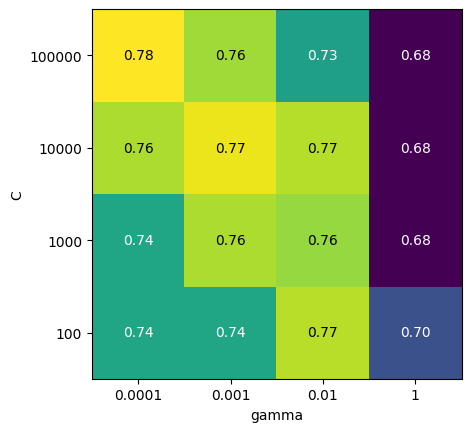

In [47]:
results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(4,4)
mglearn.tools.heatmap(scores, 
                      xlabel='gamma', 
                      xticklabels=param_grid['svm__gamma'], 
                      ylabel='C', 
                      yticklabels=param_grid['svm__C'], 
                      cmap="viridis");

In [48]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        high       0.77      0.96      0.85       159
         low       0.61      0.20      0.30        56

    accuracy                           0.76       215
   macro avg       0.69      0.58      0.58       215
weighted avg       0.73      0.76      0.71       215



# Random Forest

In [49]:
param_grid = {'rf__n_estimators':[100,150], 
              'rf__max_features': [4,5,6]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestClassifier(random_state=0))])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.78
Test set score: 0.777
Best parameters: {'rf__max_features': 6, 'rf__n_estimators': 100}


In [50]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        high       0.81      0.92      0.86       159
         low       0.62      0.38      0.47        56

    accuracy                           0.78       215
   macro avg       0.71      0.65      0.66       215
weighted avg       0.76      0.78      0.76       215



# Logística

In [51]:
param_grid={'logisticregression__C': [0.1, 1, 10, 100]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("logisticregression", LogisticRegression())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.78
Test set score: 0.753
Best parameters: {'logisticregression__C': 10}


In [52]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        high       0.78      0.94      0.85       159
         low       0.57      0.23      0.33        56

    accuracy                           0.75       215
   macro avg       0.67      0.58      0.59       215
weighted avg       0.72      0.75      0.71       215



# Gradient boosting

In [53]:
a=pd.DataFrame(datos.satisIndividual.quantile([0.25]))
x1=datos['satisIndividual']
datos['satisIndividual_cat2'] = np.where(x1 <=  a.iloc[0,0], 0, 1)
pd.value_counts(datos['satisIndividual_cat2'])
x_train, x_test, y_train, y_test = train_test_split(datos[etiq1], datos['satisIndividual_cat2'], stratify= datos['satisIndividual_cat2'],random_state=0)
scaler = MinMaxScaler().fit(x_train)

In [54]:
param_grid = {'Gradient_boosting__n_estimators': [1,5,10],
              'Gradient_boosting__gamma' : [1, 10, 100],
              'Gradient_boosting__eta' : [0.0001,0.001,0.01, 0.1],
              'Gradient_boosting__learning_rate' : [0.1,1,10]}

pipe = Pipeline([("scaler", MinMaxScaler()),("Gradient_boosting", xgb.XGBClassifier(objective="binary:logistic",
 booster='gbtree',eval_metric="auc",seed=0))])

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.78
Test set score: 0.726
Best parameters: {'Gradient_boosting__eta': 0.0001, 'Gradient_boosting__gamma': 10, 'Gradient_boosting__learning_rate': 0.1, 'Gradient_boosting__n_estimators': 1}


In [55]:
pred=grid.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.46      0.32      0.38        56
           1       0.78      0.87      0.82       159

    accuracy                           0.73       215
   macro avg       0.62      0.59      0.60       215
weighted avg       0.70      0.73      0.71       215



# Analisis de importancia

In [18]:
x_train, x_test, y_train, y_test = train_test_split(datos[etiq1], datos['satisIndividual_cat'], stratify= datos['satisIndividual_cat'],random_state=0)
param_grid = {'rf__n_estimators':[100,150], 
              'rf__max_features': [4,5,6]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestClassifier(random_state=0))])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.78
Test set score: 0.777
Best parameters: {'rf__max_features': 6, 'rf__n_estimators': 100}


<AxesSubplot: xlabel='x', ylabel='y'>

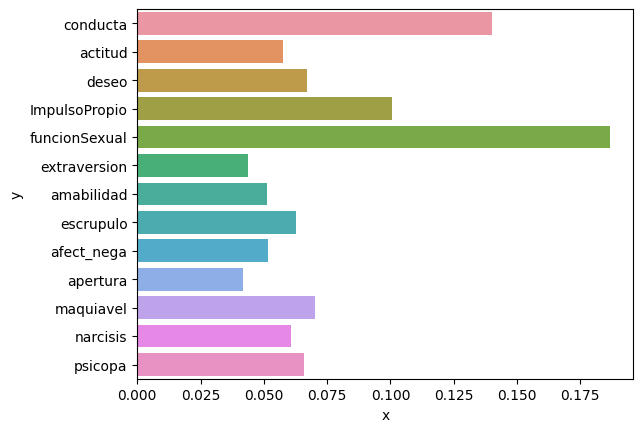

In [55]:
features=grid.best_estimator_.named_steps.rf.feature_importances_
df={'x':features,'y':datos[etiq1].columns}
df=pd.DataFrame(df)
sns.barplot(data=df, x="x", y="y")